In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

import statsmodels.formula.api as smf

In [4]:
Carseats = load_data('Carseats')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
X = MS(['Price','Urban','US']).fit_transform(Carseats)
y = Carseats['Sales']
results1 = sm.OLS(y,X).fit()
results1.summary()
# For every unit increase in price, theres an expected decrease of 0.0545 in sales
# Urban is not statistically significant so it doesn't have a significant impact on sales
# US seats tend to ahve 1.2 more sales than non-US seats

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.39e-23
Time:                        11:06:11   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Part C, writing the equation out
# Sales = 13 -0.0545Price -0.022Urban +1.2US

# For Price and US we can reject the null hypothesis since the p value < 0.05

In [7]:
# Improved model
model2 = smf.ols(formula = "Sales ~ US + Price", data=Carseats)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.66e-24
Time:                        11:06:11   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Both models have similar R squared and neither is very good
result2.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


Text(0, 0.5, 'Leverage')

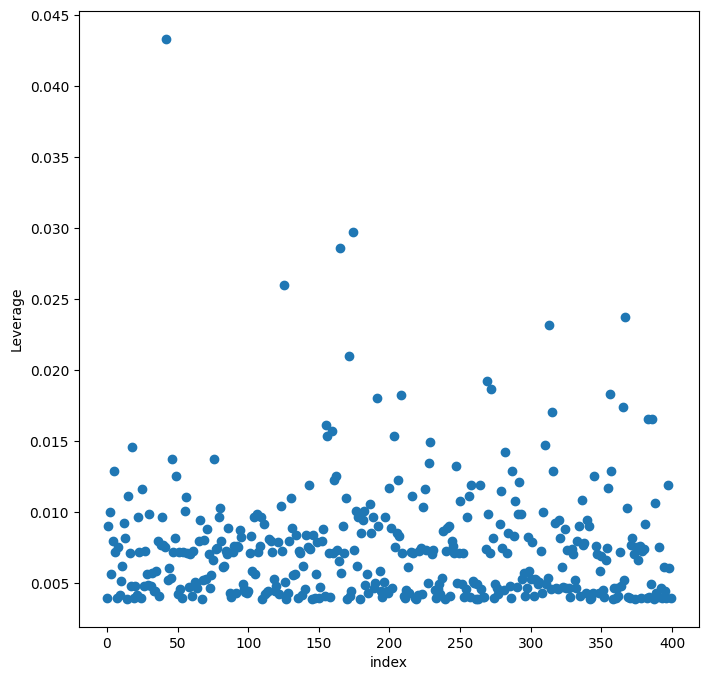

In [9]:
infl = result2.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag) # np.arange gives ints from 0 to X.shape[0] (number of obs)
ax.set_xlabel('index')
ax.set_ylabel('Leverage')
# There is clearly one point that is an outlier in terms of leverage

In [10]:
 # PROBLEM 11

In [11]:
# Investigating the t-stat for null hyp in regression without an intercept

# Generate predictor x and response y:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [12]:
result3 = sm.OLS(y,x).fit(intercept=False)
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 22 May 2024   Prob (F-statistic):                    6.23e-31
Time:                        11:06:12   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# coefficient = 1.9762, STDER = 0.117, t = 16.898, p = 0.000
# These results tell us that the variable X is a good predictor of Y because the p-value is 0
# The coefficient tells us that for every increase in X, there is about a 1.98 increase in Y
# The STDerr tells us the average value that the data points differ from the regression line, so it tells us how uncertain we are in our predictions


In [15]:
result4 = sm.OLS(x,y).fit(intercept=False)
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 22 May 2024   Prob (F-statistic):                    6.23e-31
Time:                        11:06:19   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Coef = 0.3757, std err = 0.022, t = 16.898, p = 0.000
# Same p and t values
# std err decreased and the coefficient differed as well

# The coefficients are not inverses of each other because the loss function is not symmetric

# For part E, the t-stat calculation is symmetric, so t(x,y) = t(y,x)


In [17]:
# Problem 12

# When is the coefficient of Y onto X the same as X onto Y?
# From the formula, this only happens when sum (x_i)^2 = sum (y_i)^2

# For part B, just use the data generated in question 11

In [18]:
# Part C, generating data with same coefficients regardless of order:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x

In [19]:
results5 = sm.OLS(x,y).fit()
summarize(results5)

,coef,std err,t,P>|t|
x1,1.0,4.440000e-17,2.250000e+16,0.0


In [20]:
results6 = sm.OLS(y,x).fit()
summarize(results5)

,coef,std err,t,P>|t|
x1,1.0,4.440000e-17,2.250000e+16,0.0
